In [15]:
pip install pdf2image #required installation 

In [16]:
!apt-get install poppler-utils #required installation 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (284 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [17]:
# required installation

!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract
!pip install pillow

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,479 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 160843 files and directories currently installed.)
Preparing to unpack .../tesserac

## importing required libraries

In [18]:
import pdf2image 
from pdf2image import convert_from_path #converting pdf's to images
import os
import pytesseract # optical character recognition tool for python(read and recognize text)
from PIL import Image #python interpreter with image editing capabilities
import cv2
import matplotlib.pyplot as plt

In [19]:
converted_images = "/content/drive/MyDrive/con_images"

## function to convert PDF pages into images

In [20]:
pdfs = r"/content/drive/MyDrive/text_file.pdf"
pages = convert_from_path(pdfs, 350)

i = 1
for page in pages:
    image_name = "Page_" + str(i) + ".jpg"  
    page.save(os.path.join(converted_images,image_name), "JPEG")
    i = i+1

In [21]:
def display_image_in_actual_size(np_array):

    dpi = 600
    im_data = np_array
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

## let's have a look in the particular image

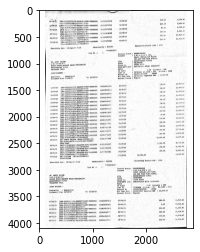

In [22]:
img = cv2.imread("/content/drive/MyDrive/con_images/Page_2.jpg")

plt.imshow(img)

## The below code can be used for marking the regions of interest in the image and getting their respective co-ordinates.

In [23]:
def mark_region(image_path):
    
    im = cv2.imread(image_path)

    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (1,1), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x,y,w,h = cv2.boundingRect(c)

        if y >= 600 and x <= 1000:
            if area > 10000:
                image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
                line_items_coordinates.append([(x,y), (2200, y+h)])

        if y >= 2400 and x<= 2000:
            image = cv2.rectangle(im, (x,y), (2200, y+h), color=(255,0,255), thickness=3)
            line_items_coordinates.append([(x,y), (2200, y+h)])


    return image, line_items_coordinates

## here we get the respctive coordinates of the particular image 

In [24]:
mark_region("/content/drive/MyDrive/con_images/Page_2.jpg")

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [25]:
img,lic = mark_region("/content/drive/MyDrive/con_images/Page_2.jpg") 

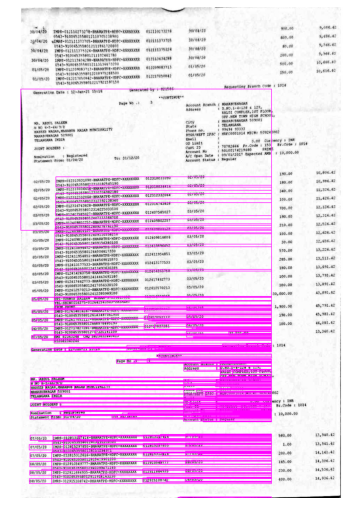

In [26]:
display_image_in_actual_size(img)

In [27]:
len(lic)

228

## output from Optical Character Recognition (OCR)

Accaunt Branch | MARABVONAGNA



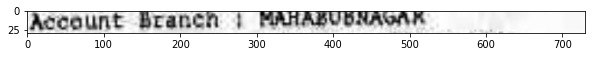

In [30]:
# load the original image
image = cv2.imread("/content/drive/MyDrive/con_images/Page_2.jpg")

# get co-ordinates to crop the image
c = lic[150]

# cropping image img = image[y0:y1, x0:x1]
img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

plt.figure(figsize=(10,10))
plt.imshow(img)

# convert the image to black and white for better OCR
ret,thresh1 = cv2.threshold(img,120,255,cv2.THRESH_BINARY)

# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

## converting images into string using pytesseract

In [33]:
print(pytesseract.image_to_string(Image.open("/content/drive/MyDrive/con_images/Page_2.jpg")))

yo 0a/3d

Uyina/ 20
30/04/20
30/04/20
O1/048/20
01/05/20

Generation Date : 12 dan?) 15:16

ee eee

TMPS= 0121102732 78~HHARATPE-HEPC+AXRRAKRRK
OSGS-91NTHSISHOOL ZITO TOSS 18900
TMPS= 012111273 705+BHARATER HYPO“ REXKKKEN
OSS2- LOOKS ISSROL OLLI MHL TEBGND
IMPS= 1211197532 8=BHARATPR-HOPCeRRRXERNE
DSGN-FLOORHINSOOL OL DOL eG 17 Aao
INPS*O1221 46942 2O<RRAPATER*ADPO*KEREXERK
OHA VT HOGSISSAOLELLIL HET INGO
TMPS«<0122 090097 1+BHARATP MDP CHR ANKMAAK
OSGD= BL OO ESISSHOLLD IA HIND DASOO
IMPE*OLL21 105 0842 ~BHARA TPE ITP C*XARARANK
ONGA* SLOOKSISHOOT LIL) 1597150

Page Wo «1

MR. APDOL SALEEN

H WO 6E-68/9/0

HABEEPE AGAR, MAHABUS NAGAR MUNCTPALITY
MARABCENAGAR sosool

TELANGANA INDIA

QOINT ROLDESS :

Nomi he tion
Statement From: o1/0a/20

o2/os/20
02/05/20
02/05/20
0/05/20
ogvos/20
03/05/20
O3/705/20
o3/0S/20
OMeS/ 20
OS 054.20
o3/05/20
o3/0S/20
a3705/20
OS /05/20
o5/0S/20

05/09/20
05/95/20
6/05/20
01/05/20

Generation Date : 12-Jan-21 15:16

+ istered
ar Tor 31/12/20

IMPS=0123100310

### Get bounding box estimates

In [36]:
print(pytesseract.image_to_boxes(Image.open("/content/drive/MyDrive/con_images/Page_2.jpg")))

y 193 3864 201 3889 0
o 208 3861 225 3889 0
0 226 3863 249 3919 0
a 261 3864 271 3892 0
/ 279 3862 290 3894 0
3 295 3864 303 3921 0
d 303 3864 331 3921 0
U 194 3786 209 3810 0
y 210 3775 218 3813 0
i 218 3775 240 3813 0
n 246 3788 258 3814 0
a 265 3784 276 3812 0
/ 285 3786 294 3813 0
2 301 3784 308 3812 0
0 308 3784 335 3812 0
3 200 3707 212 3734 0
0 216 3707 228 3736 0
/ 236 3705 245 3736 0
0 251 3707 264 3732 0
4 269 3704 280 3732 0
/ 289 3704 298 3734 0
2 305 3705 316 3734 0
0 323 3704 340 3733 0
3 204 3627 219 3655 0
0 221 3627 234 3653 0
/ 240 3627 252 3653 0
0 256 3627 269 3654 0
4 277 3626 284 3652 0
/ 294 3627 307 3653 0
2 311 3626 323 3653 0
0 323 3626 345 3653 0
O 210 3550 222 3577 0
1 229 3548 240 3576 0
/ 245 3550 259 3575 0
0 262 3551 278 3575 0
4 278 3551 278 3575 0
8 285 3552 292 3577 0
/ 301 3554 309 3574 0
2 316 3548 326 3575 0
0 332 3550 348 3575 0
0 213 3473 230 3498 0
1 234 3471 243 3499 0
/ 251 3470 261 3500 0
0 268 3471 278 3498 0
5 284 3471 295 3498 0
/ 306 3475

### Get verbose data including boxes, confidences, line and page numbers

In [37]:
print(pytesseract.image_to_data(Image.open("/content/drive/MyDrive/con_images/Page_2.jpg")))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2895	4092	-1	
2	1	1	0	0	0	193	171	159	451	-1	
3	1	1	1	0	0	193	171	138	60	-1	
4	1	1	1	1	0	193	171	138	60	-1	
5	1	1	1	1	1	193	203	32	28	1	yo
5	1	1	1	1	2	226	171	105	59	0	0a/3d
3	1	1	2	0	0	194	278	158	344	-1	
4	1	1	2	1	0	194	278	141	39	-1	
5	1	1	2	1	1	194	278	101	39	0	Uyina/
5	1	1	2	1	2	301	280	34	28	14	20
4	1	1	2	2	0	200	356	140	32	-1	
5	1	1	2	2	1	200	356	140	32	91	30/04/20
4	1	1	2	3	0	204	437	141	29	-1	
5	1	1	2	3	1	204	437	141	29	71	30/04/20
4	1	1	2	4	0	210	515	138	29	-1	
5	1	1	2	4	1	210	515	138	29	24	O1/048/20
4	1	1	2	5	0	213	592	139	30	-1	
5	1	1	2	5	1	213	592	139	30	33	01/05/20
2	1	2	0	0	0	218	695	576	40	-1	
3	1	2	1	0	0	218	695	576	40	-1	
4	1	2	1	1	0	218	695	576	40	-1	
5	1	2	1	1	1	218	708	174	27	85	Generation
5	1	2	1	1	2	410	705	69	27	73	Date
5	1	2	1	1	3	502	710	9	19	63	:
5	1	2	1	1	4	534	701	30	28	0	12
5	1	2	1	1	5	569	699	115	27	0	dan?)
5	1	2	1	1	6	710	695	84	28	16	15:16
2	1	3	0	0	0	371	

# Get information about orientation and script detection

In [38]:
print(pytesseract.image_to_osd(Image.open("/content/drive/MyDrive/con_images/Page_2.jpg")))

Page number: 0
Orientation in degrees: 180
Rotate: 180
Orientation confidence: 0.39
Script: Fraktur
Script confidence: 1.78

